In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics 
%matplotlib inline

In [2]:
data = [10,9,9.5,8.5,8,4]
index = list(range(len(data)))

print(list(zip(index, data)))

[(0, 10), (1, 9), (2, 9.5), (3, 8.5), (4, 8), (5, 4)]


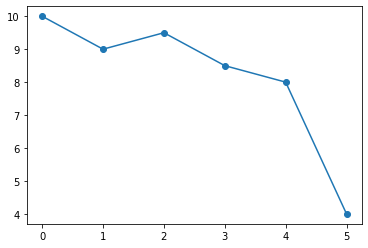

In [3]:
plt.plot(index, data, marker='o')

# Smoothing the data

# Bining

In [14]:
num_bins = 2 #can be 1,2,3,6
values_in_bin = int(len(data)/num_bins)

print('number of bins', num_bins) 
print('number of values in each bin', values_in_bin)

number of bins 2
number of values in each bin 3


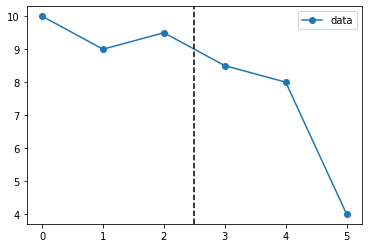

In [15]:
plt.plot(index, data, marker='o', label='data')

#bins borders
for i in range(1,num_bins):
    plt.axvline(x=i*values_in_bin-0.5, linestyle='--', color='black')

plt.legend()
plt.show()

## by mean

In [16]:
b_mean = []

for i in range(num_bins):
    
    index_range_low = i*values_in_bin #the bin starts from this index
    index_range_high = i*values_in_bin+values_in_bin #the bin end on this index
    
    #create an empty bin
    bin_values = [] 
    
    #collect the mean of the original data[that is inside the range of this bin]
    for j in range(values_in_bin):
        bin_values.append(np.mean( data[index_range_low:index_range_high] ))
    
    #add this bin to list
    b_mean.extend(bin_values) 

    #show the existing bins
print(data)
print(b_mean)                     

[10, 9, 9.5, 8.5, 8, 4]
[9.5, 9.5, 9.5, 6.833333333333333, 6.833333333333333, 6.833333333333333]


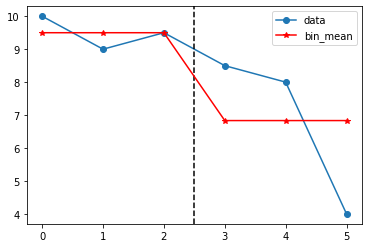

In [17]:
plt.plot(index, data, marker='o', label='data')

#bins borders
for i in range(1,num_bins):
    plt.axvline(x=i*values_in_bin-0.5, linestyle='--', color='black')

plt.plot(index, b_mean, marker='*', label='bin_mean', color='red')

plt.legend()
plt.show()

## by median

In [18]:
b_med = []

for i in range(num_bins):
    index_range_low = i*values_in_bin
    index_range_high = i*values_in_bin+values_in_bin
    
    bin_values = [] 
    
    #collect the median of the original data[that is inside the range of this bin]
    for j in range(values_in_bin):
        bin_values.append(np.median( data[index_range_low:index_range_high] ))
    
    b_med.extend(bin_values) 
    
    print(index_range_low, index_range_high, b_med)                     

0 3 [9.5, 9.5, 9.5]
3 6 [9.5, 9.5, 9.5, 8.0, 8.0, 8.0]


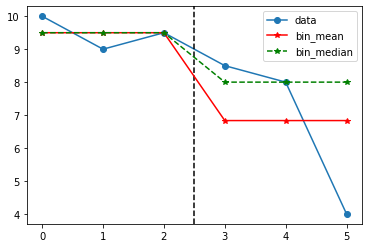

In [19]:
plt.plot(index, data, marker='o', label='data')

#bins borders
for i in range(1,num_bins):
    plt.axvline(x=i*values_in_bin-0.5, linestyle='--', color='black')

plt.plot(index, b_mean, marker='*', label='bin_mean', color='red')
plt.plot(index, b_med, marker='*', linestyle='--', label='bin_median', color='green')

plt.legend()
plt.show()

## by border

In [20]:
data, num_bins

([10, 9, 9.5, 8.5, 8, 4], 2)

In [21]:
b_bord = []

for i in range(num_bins):
    index_range_low = i*values_in_bin
    index_range_high = i*values_in_bin+values_in_bin
    
    bin_values = [] 
    
    #collect the border values
        
    data_s = data[index_range_low:index_range_high]

    b_border_low = data_s[0]
    b_border_high = data_s[-1]
        
    #replace values in bin with what's closer to border
    for j in range(len(data_s)):   
        if abs(b_border_low-data_s[j]) < abs(b_border_high-data_s[j]):
            bin_values.append(b_border_low)
        else:
            bin_values.append(b_border_high)
    
    b_bord.extend(bin_values)
    
print(b_bord)

[10, 9.5, 9.5, 8.5, 8.5, 4]


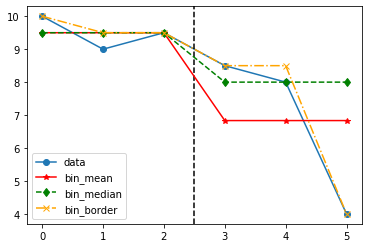

In [22]:
plt.plot(index, data, marker='o', label='data')

#bins borders
for i in range(1,num_bins):
    plt.axvline(x=i*values_in_bin-0.5, linestyle='--', color='black')

plt.plot(index, b_mean, marker='*', label='bin_mean', color='red')
plt.plot(index, b_med, marker='d', linestyle='--', label='bin_median', color='green')
plt.plot(index, b_bord, marker='x', linestyle='-.', label='bin_border', color='orange')


plt.legend()
plt.show()

# Linear regression smoothing 

## with LOWESS

In [23]:
import statsmodels.api as sm

### frac: Between 0 and 1. The fraction of the data used when estimating each y-value.
### it: The number of residual-based reweightings to perform.
### delta: Distance within which to use linear-interpolation instead of weighted regression.

In [24]:
import random 
#Generate 20 random numbers between 1 and 100
data2 = random.sample(range(1, 100), 20)

In [25]:
data2

[59, 87, 68, 27, 2, 35, 51, 84, 67, 36, 57, 18, 75, 10, 46, 14, 56, 93, 63, 79]

In [31]:
index2 = list(range(len(data2)))
lowess = sm.nonparametric.lowess

### lowess(y, x, frac, it, delta)

l_smooth = lowess(data2, index2)
l_smooth02 = lowess(data2, index2, frac=0.2)
l_smooth08 = lowess(data2, index2, frac=0.99)

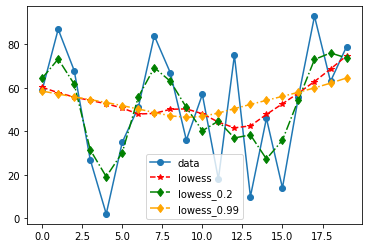

In [32]:
plt.plot(data2, marker='o', label='data')

plt.plot(l_smooth[:,1], marker='*', linestyle='--', label='lowess', color='red')
plt.plot(l_smooth02[:,1], marker='d', linestyle='-.', label='lowess_0.2', color='green')
plt.plot(l_smooth08[:,1], marker='d', linestyle='-.', label='lowess_0.99', color='orange')

plt.legend()
plt.show()

## with convolution

### A Savitzky–Golay filter is a digital filter that can be applied to a set of digital data points for the purpose of smoothing the data, that is, to increase the precision of the data without distorting the signal tendency. This is achieved, in a process known as convolution, by fitting successive sub-sets of adjacent data points with a low-degree polynomial by the method of linear least squares. 

In [33]:
from scipy.signal import savgol_filter 
data_sf = savgol_filter(data2, 5, 3)

data_sf2 = savgol_filter(data2, 5, 1)

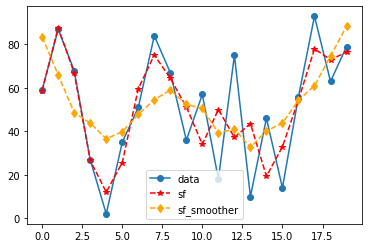

In [34]:
plt.plot(data2, marker='o', label='data')

plt.plot(data_sf, marker='*', linestyle='--', label='sf', color='red')
plt.plot(data_sf2, marker='d', linestyle='--', label='sf_smoother', color='orange')

plt.legend()
plt.show()